# Factor analysis

**Correlations**

If city variables are positively correlated, improvement measures could have double benefits.
In case of negative correlation, difficult choices need to be made, as improving one will negatively impact the other.
In both situations we would like to know.. :-)

**Factor analysis**

Which are the underlying factors "running" the city? 

#### 1. Imports, settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from factor_analyzer import FactorAnalyzer

# SETTINGS
# data source
file_grid = "./ehv-grid-apr23.csv" 

def load_data():
    data = pd.read_csv(file_grid)
    print("{} datapoints", len(data)) 
    return data


#### 2. Loading the data. Preprocessing

In [5]:
df = load_data()
df.info()

{} datapoints 11832
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11832 entries, 0 to 11831
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lat                     11832 non-null  int64  
 1   lon                     11832 non-null  int64  
 2   Enb.avg_income          7097 non-null   float64
 3   Enb.woz                 6888 non-null   float64
 4   Enbp.high_education     8055 non-null   float64
 5   Enbp.independent        6866 non-null   float64
 6   Enbp.low_education      8107 non-null   float64
 7   Enbp.unemployed         6933 non-null   float64
 8   Gcb.buurt               11832 non-null  object 
 9   Gcb.buurtcode           11832 non-null  int64  
 10  Inp.Grey                11832 non-null  float64
 11  Pnb.cohesion            6704 non-null   float64
 12  Pnb.diversity           6998 non-null   float64
 13  Pnb.good_life           6704 non-null   float64
 14  Pnb.pop           

In [6]:
# make data numeric where needed
for x in df.columns:
    #print(x,df[x].dtype)
    try:
        if (x[0]=='n') and (df[x].dtype=='object'):
            df[x] = df[x].str.replace(',','.')
            df[x] = pd.to_numeric(df[x],errors="coerce")
            df[x] = df[x].astype(float)
        #print(x,df[x].dtype)
    except:
        print('error .. ',x,df[x].dtype)
 

In [7]:

s = df.columns[2:]
VARS_TO_USE = ['lat','lon'] + s[s.str.split('.').str[0].str.contains('n')].tolist()
VARS_TO_USE = s[s.str.split('.').str[0].str.contains('n')].tolist()
print(VARS_TO_USE)


['Enb.avg_income', 'Enb.woz', 'Enbp.high_education', 'Enbp.independent', 'Enbp.low_education', 'Enbp.unemployed', 'Inp.Grey', 'Pnb.cohesion', 'Pnb.diversity', 'Pnb.good_life', 'Pnb.pop', 'Pnbp.complains_aq', 'Pnbp.complains_noise', 'Pnbp.feels_unsafe', 'Pnbp.mostly_by_car', 'Pnbp.mostly_walking', 'Pnbp.unhappy', 'Vn.PM10_avg_2020', 'Vn.PM10_avg_2021', 'Vn.PM10_avg_2022', 'Vn.med_tree_height', 'Vn.number_species', 'Vn.number_tree_species', 'Vn.number_trees', 'Vn.prec_ann', 'Vn.tavg_ann', 'Vnp.Green']


In [8]:
x=df[VARS_TO_USE]
#x.dropna(inplace=True)
x.describe()

,Enb.avg_income,Enb.woz,Enbp.high_education,Enbp.independent,Enbp.low_education,Enbp.unemployed,Inp.Grey,Pnb.cohesion,Pnb.diversity,Pnb.good_life,...,Vn.PM10_avg_2020,Vn.PM10_avg_2021,Vn.PM10_avg_2022,Vn.med_tree_height,Vn.number_species,Vn.number_tree_species,Vn.number_trees,Vn.prec_ann,Vn.tavg_ann,Vnp.Green
count,7097.000000,6888.000000,8055.000000,6866.000000,8107.000000,6933.000000,11832.000000,6704.000000,6998.000000,6704.000000,...,18.000000,22.000000,22.000000,7268.000000,1894.000000,7268.000000,7268.000000,10813.000000,10813.000000,11832.000000
mean,50.650314,339.983595,41.799733,74.977231,24.871942,8.318044,0.229172,6.140701,0.519957,7.655087,...,16.848882,18.132540,17.554738,11.992157,2.016895,3.523528,12.360759,64.346419,10.032584,0.260314
std,23.179834,149.735569,16.654498,7.336753,13.467604,8.947946,0.258033,0.620380,0.156775,0.495690,...,2.312051,1.912026,2.058443,4.561819,2.189088,2.537214,9.162254,0.310965,0.089316,0.321269
min,9.600000,111.000000,0.000000,50.600000,2.600000,2.000000,0.000000,4.700000,0.110000,6.500000,...,10.985531,14.931067,14.625442,3.000000,1.000000,1.000000,1.000000,63.416667,9.850428,0.000000
25%,36.200000,240.000000,30.200000,68.590000,15.900000,3.000000,0.029997,5.600000,0.390000,7.300000,...,15.646075,16.675136,16.050862,7.500000,1.000000,2.000000,6.000000,64.250000,9.945994,0.002787
50%,42.000000,278.000000,39.790000,77.090000,23.900000,7.000000,0.129499,6.200000,0.550000,7.700000,...,17.176730,17.906392,17.301302,10.500000,1.000000,3.000000,11.000000,64.500000,9.986415,0.104838
75%,62.700000,432.000000,56.300000,80.590000,32.100000,9.000000,0.340577,6.500000,0.630000,8.100000,...,18.243905,19.653500,18.608513,15.000000,2.000000,5.000000,17.000000,64.583333,10.119080,0.422366
max,150.190000,923.000000,83.900000,87.900000,83.300000,50.000000,0.950000,7.600000,0.890000,8.500000,...,20.842583,21.674248,23.465938,21.000000,24.000000,22.000000,111.000000,64.583333,10.119080,0.950000


#### 2. Correlations

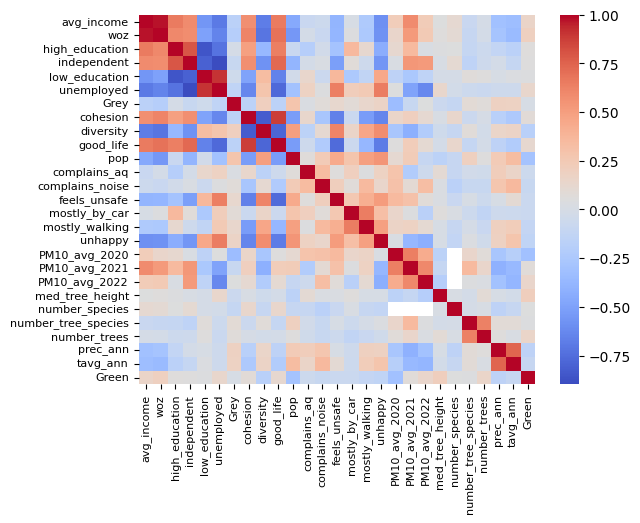

In [9]:
corr_matrix = x.corr()
short_names = corr_matrix.columns.str.split('.').str[-1]
#sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, cbar=True)
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', xticklabels=short_names, yticklabels=short_names, cbar=True)
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [10]:
x_scaled = pd.DataFrame(data=preprocessing.scale(X=x))
corr = x_scaled.corr()
corr

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.000000,0.973912,0.657048,0.587954,-0.559605,-0.692147,-0.166519,0.573894,-0.680769,0.657193,...,0.225346,0.587151,0.233303,0.044018,0.112661,-0.086161,-0.013319,-0.307710,-0.332373,0.159188
1,0.973912,1.000000,0.603757,0.579705,-0.499568,-0.647278,-0.199964,0.620176,-0.717106,0.691332,...,0.143570,0.520338,0.246122,0.059002,0.101682,-0.097903,-0.018819,-0.288856,-0.350076,0.193684
2,0.657048,0.603757,1.000000,0.793962,-0.855241,-0.724262,-0.012030,0.488753,-0.365519,0.638176,...,0.122821,0.350519,0.017160,0.043041,0.044267,-0.106240,-0.067001,-0.120267,-0.170356,0.063208
3,0.587954,0.579705,0.793962,1.000000,-0.808730,-0.898452,-0.095018,0.572335,-0.582476,0.731971,...,0.015482,0.534068,0.523909,0.006646,0.105044,-0.147839,-0.058806,-0.021652,-0.108827,0.056095
4,-0.559605,-0.499568,-0.855241,-0.808730,1.000000,0.904248,-0.050772,-0.492436,0.336282,-0.657496,...,-0.152191,-0.255226,-0.149040,-0.010996,-0.010796,0.072669,0.051712,-0.000584,0.035234,0.041598
5,-0.692147,-0.647278,-0.724262,-0.898452,0.904248,1.000000,-0.136281,-0.631903,0.286414,-0.766692,...,0.044980,-0.494704,-0.628429,0.137658,-0.027047,-0.066460,-0.082634,-0.057217,-0.054271,0.138580
6,-0.166519,-0.199964,-0.012030,-0.095018,-0.050772,-0.136281,1.000000,-0.161271,0.201349,-0.160615,...,-0.339911,-0.092668,0.050416,-0.068627,-0.105173,0.093842,0.066234,0.188851,0.179920,0.002815
7,0.573894,0.620176,0.488753,0.572335,-0.492436,-0.631903,-0.161271,1.000000,-0.829853,0.877276,...,0.153114,0.201809,0.112352,0.010839,0.137189,-0.068173,-0.006336,-0.182419,-0.240081,0.087779
8,-0.680769,-0.717106,-0.365519,-0.582476,0.336282,0.286414,0.201349,-0.829853,1.000000,-0.783481,...,-0.272072,-0.419290,-0.223163,-0.052550,-0.100242,0.080164,-0.023726,0.147695,0.164712,-0.180304
9,0.657193,0.691332,0.638176,0.731971,-0.657496,-0.766692,-0.160615,0.877276,-0.783481,1.000000,...,0.053454,0.228689,0.109341,-0.019672,0.136516,-0.106246,-0.021279,-0.152346,-0.221411,0.119961


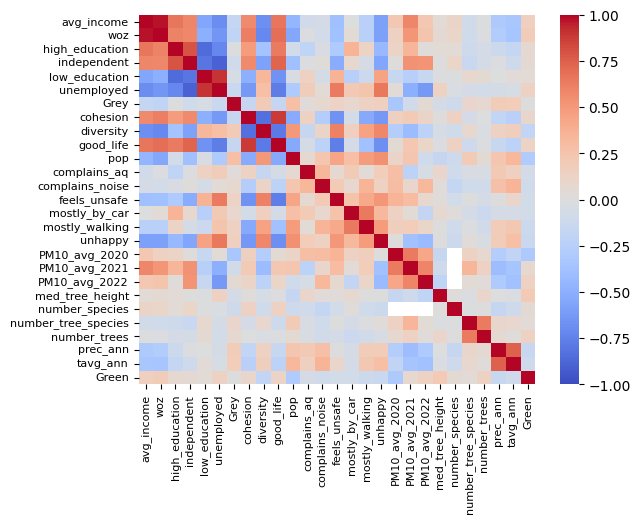

In [11]:
#sns.heatmap(data = corr,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=False)
sns.heatmap(corr, annot=False, vmin=-1,vmax=1,center=0,cmap='coolwarm', xticklabels=short_names, yticklabels=short_names, cbar=True)
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [110]:
fa=FactorAnalyzer(n_factors = 7, rotation = 'varimax')
fa.fit(X=x_scaled)
loadings=fa.loadings_

In [111]:
print(loadings)

[[-3.15805548e-01  4.16328725e-01  8.00471229e-01 -1.23685362e-01
  -1.97906109e-02  1.52369947e-02 -6.49226231e-03]
 [-3.95089350e-01  2.31815729e-01  8.45215867e-01 -1.26083000e-01
   4.61021852e-02  1.60490671e-02 -8.08190427e-03]
 [-2.70803857e-01  8.05528556e-01  2.13964969e-01 -8.86527338e-02
   2.54444299e-01 -5.61169300e-02  2.21630105e-03]
 [-6.61829009e-01  3.65818594e-01  1.52559382e-01 -1.01069265e-01
   1.44789292e-01 -1.38309307e-01  1.80372155e-02]
 [ 1.84245409e-01 -8.79606346e-01 -1.23374974e-01 -3.49666281e-02
  -1.14460812e-01  4.17254476e-02 -9.11463009e-03]
 [ 6.76520189e-02 -5.75363881e-01 -7.45258525e-02 -8.78574033e-02
   1.24207625e-01 -6.32487185e-02 -1.08350652e-02]
 [ 1.60872335e-01  8.03524456e-02 -3.27432233e-02  2.68048999e-01
   2.72976398e-02  1.20890281e-01  8.69450080e-03]
 [-8.31236513e-01  8.94908783e-02  2.66670670e-01 -1.61681083e-01
  -8.54691920e-02 -3.54612131e-03 -2.37992513e-03]
 [ 6.32104542e-01 -3.23153795e-02 -4.98621215e-01  3.75427393e-0

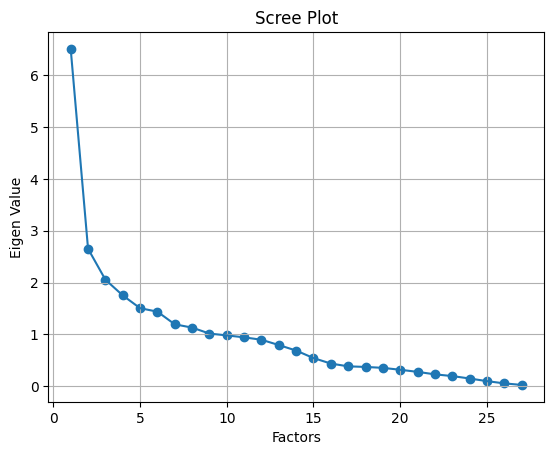

In [112]:
#How many factors?
#dataframe=x_scaled
dataframe=x_scaled
fa = FactorAnalyzer(rotation = None,impute = "mean",n_factors=dataframe.shape[1])
fa.fit(dataframe)
ev,_ = fa.get_eigenvalues()

plt.scatter(range(1,dataframe.shape[1]+1),ev)
plt.plot(range(1,dataframe.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [116]:
fa = FactorAnalyzer(n_factors=5,rotation='varimax')
fa.fit(dataframe)
print(pd.DataFrame(fa.loadings_,index=short_names))


                            0         1         2         3         4
avg_income          -0.608173  0.429207 -0.118320  0.047733  0.435481
woz                 -0.678219  0.284091 -0.100537  0.012249  0.528913
high_education      -0.252715  0.867125 -0.091572 -0.116741  0.159789
independent         -0.593092  0.418941 -0.082194 -0.237343  0.033836
low_education        0.180778 -0.890651 -0.003425  0.036537 -0.004999
unemployed           0.125725 -0.531333 -0.037447 -0.142050  0.102686
Grey                 0.162817  0.085615  0.258162  0.143911 -0.001988
cohesion            -0.849952  0.121022 -0.146023 -0.061156  0.007359
diversity            0.785528 -0.059727  0.013228  0.000044 -0.243762
good_life           -0.854277  0.295333 -0.155303 -0.109912 -0.036284
pop                  0.447929  0.141696  0.377914  0.187636  0.143175
complains_aq        -0.043810 -0.129789  0.337206 -0.064076  0.277118
complains_noise      0.168018  0.058013  0.392041 -0.105371  0.203749
feels_unsafe        

In [103]:
def NPos(lst):
    for i in range(len(lst)):
        if lst[i] < 0.3:
            return i-1
    return 0

def NNeg(lst):
    for i in range(len(lst)-1,0,-1):
        if lst[i] > -0.3:
            return len(lst)-i+1
    return 0

In [117]:
loadings = pd.DataFrame(fa.loadings_, index=short_names)
for i in range(5):
    factor_vars = loadings.iloc[:,i].sort_values(ascending=False)
    factor_vars_neg = loadings.iloc[:,i].sort_values(ascending=True)
    npos = NPos(factor_vars)
    nneg = NNeg(factor_vars) 
    print(i,npos,nneg)
    print(f"Factor {i} pos: {list(factor_vars.index[:npos])}")
    print(f"Factor {i} pos: {list(factor_vars[:npos])}")
    print(f"Factor {i} neg: {list(factor_vars_neg.index[:nneg])}")
    print(f"Factor {i} neg: {list(factor_vars_neg[:nneg])}")


0 4 7
Factor 0 pos: ['diversity', 'unhappy', 'feels_unsafe', 'mostly_walking']
Factor 0 pos: [0.7855276634204351, 0.703906888613205, 0.6904894461371542, 0.5874500099989395]
Factor 0 neg: ['good_life', 'cohesion', 'woz', 'avg_income', 'independent', 'high_education', 'Green']
Factor 0 neg: [-0.8542765489806471, -0.8499517581209415, -0.6782186606450092, -0.6081734421395825, -0.5930924083730945, -0.25271541596629493, -0.10184203730685193]
1 2 4
Factor 1 pos: ['high_education', 'avg_income']
Factor 1 pos: [0.8671251461760231, 0.4292066826766795]
Factor 1 neg: ['low_education', 'unemployed', 'unhappy', 'complains_aq']
Factor 1 neg: [-0.8906505213482471, -0.5313329693131877, -0.2102532004096843, -0.1297885766632212]
2 4 2
Factor 2 pos: ['prec_ann', 'tavg_ann', 'complains_noise', 'pop']
Factor 2 pos: [0.7923841644353015, 0.7765975459008683, 0.39204121601178205, 0.3779141445647168]
Factor 2 neg: ['Green', 'good_life']
Factor 2 neg: [-0.18190689339266355, -0.15530262825379665]
3 1 2
Factor 3 po

## Corelations

In [34]:
type(loadings)

numpy.ndarray

In [39]:
x_scaled.columns

RangeIndex(start=0, stop=29, step=1)

In [ ]:
loadings = pd.DataFrame(fa.loadings_, columns=df.columns)

for factor_num in range(loadings.shape[1]):
    factor_loadings = loadings.iloc[:, factor_num]
    top_features = factor_loadings.abs().sort_values(ascending=False)[:3]
    print(f"Factor {factor_num + 1}:")
    print(loadings.index[top_features.index].tolist())